# **Projet** : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bsita*

**Notre objectif est classifier de façon efficace et efficiente des fruits et légumes.**
- Pour ce faire, on propose un première base de données, *simple-database*, dans laquelle chaque photo présente un unique fruit sur fond blanc.
- Pour complexifier les choses, on optera dans un second temps pour une base de données, *realistic-database*, avec certes moins de classes, mais dont les photos sont moins évidentes, plus réalistes.
- Nous déterminerons ensuite les potentiels bienfaits d'une base de données hybride entre la première et la seconde, *hybrid-database*.

Enfin, parce que c'est amusant, nous avons soumis les candidats à l'élection présidentielle de 2022 au détecteur de fruit... 

<b> Paramètres globaux du document </b>
1. <b>Version distante :</b> Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. <b>Version locale :</b> Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [1]:
import sys
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Version distante (1)
'''
!git clone https://github.com/EnzoN7/Image-classification.git
path1 = "./Image-classification/databases/simple-database/"
path2 = "./Image-classification/databases/realistic-database/"
path3 = "./Image-classification/databases/hybrid-database/"
sys.path.insert(1, "./Image-classification/scripts/")
sys.path.insert(1, "./Image-classification/models/")
'''

# Version locale (2)
path1 = "./databases/simple-database/"
path2 = "./databases/realistic-database/"
path3 = "./databases/hybrid-database/"
sys.path.insert(1, "./scripts")
sys.path.insert(1, "./models")

# (1) et (2)
from Load import load_data
from Plots import plot_training_analysis, plot_random_images, plot_candidates, print_false_values
from Tests import test_data
from BasicConvolutionalNetwork import BasicConvolutionalNetwork # Conseillé
from VGG16Network import VGG16Network                           # Déconseillé : trop lent
from InceptionV3Network import InceptionV3Network               # Déconseillé : apprentissage inadéquat

# **Partie 1** : simple-database

<b> Paramètres de la base de données</b>

DATASET         : ./databases/simple-database/train
NOMBRE D'IMAGES : 6565

DATASET         : ./databases/simple-database/validation
NOMBRE D'IMAGES : 1376

DATASET         : ./databases/simple-database/simple-test
NOMBRE D'IMAGES : 1386



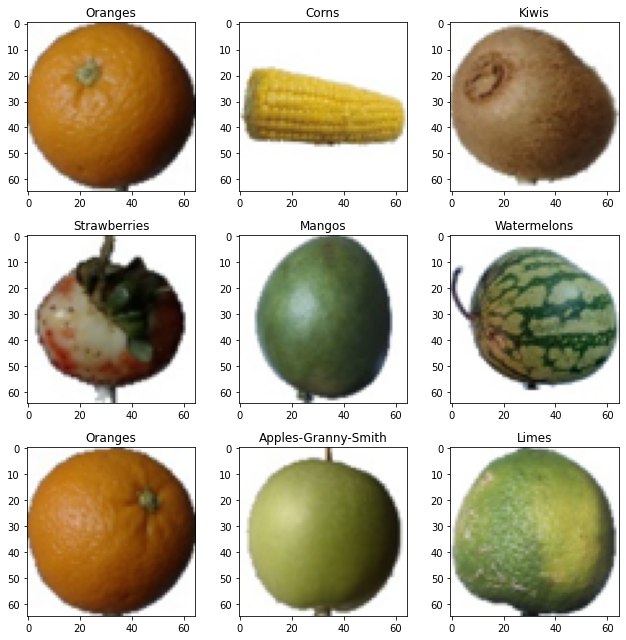

In [30]:
IMAGE_SIZE1 = 65
labels1 = ['Apples-Braeburn', 'Apples-Granny-Smith', 'Apricots', 'Clementines','Corns',
           'Cucumber-Ripes', 'Green-Peppers', 'Kiwis', 'Lemons', 'Limes',
           'Mangos', 'Onions', 'Oranges', 'Peaches', 'Pineapples',
           'Red-Peppers', 'Strawberries', 'Tomatoes', 'Watermelons']

x_train1, y_train1 = load_data(path1, labels1, _imagesize=IMAGE_SIZE1)
x_val1, y_val1 = load_data(path1, labels1, _dataset='validation', _imagesize=IMAGE_SIZE1)
x_simpleTest, y_simpleTest = load_data(path1, labels1, _dataset='simple-test', _imagesize=IMAGE_SIZE1)

plot_random_images(x_train1, y_train1, labels1)

<b>Lancement de l'entraînement</b>

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train1, y_train1)
val_generator = train_datagen.flow(x_val1, y_val1)

model1 = BasicConvolutionalNetwork(len(labels1), IMAGE_SIZE1)

In [31]:
model1.build(input_shape=(None, IMAGE_SIZE1, IMAGE_SIZE1, 3))
model1.summary()
model1.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['sparse_categorical_accuracy'])

history = model1.fit(train_generator, 
                     validation_data=val_generator,
                     epochs=10)

Model: "basic_convolutional_network_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          multiple                  896       
                                                                 
 conv2d_21 (Conv2D)          multiple                  18496     
                                                                 
 conv2d_22 (Conv2D)          multiple                  54238     
                                                                 
 conv2d_23 (Conv2D)          multiple                  108416    
                                                                 
 max_pooling2d_5 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         multiple                  0         
                                     

<b>Analyse post-entraînement</b>
- <b>Prédiction de la classe</b> éventuelle d'une image test prise aléatoirement dans la base de donnée.
- <b>Evalutation du modèle</b> dans sa globalité.
- *(Affichage éventuel des prédictions râtées.)*

PREDICTIONS sur la donnée n°692/1385
     Apples-Braeburn -> 0.00%
     Apples-Granny-Smith -> 0.00%
     Apricots -> 0.00%
     Clementines -> 0.00%
     Corns -> 0.00%
     Cucumber-Ripes -> 0.00%
     Green-Peppers -> 0.14%
     Kiwis -> 0.00%
     Lemons -> 0.00%
     Limes -> 0.09%
     Mangos -> 99.09%
     Onions -> 0.00%
     Oranges -> 0.00%
     Peaches -> 0.00%
     Pineapples -> 0.00%
     Red-Peppers -> 0.00%
     Strawberries -> 0.01%
     Tomatoes -> 0.00%
     Watermelons -> 0.66%

RESULTAT : Mangos / 99.09%
ATTENDU  : Mangos


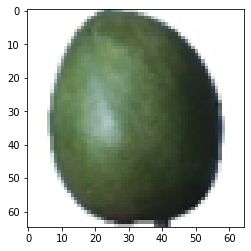

In [32]:
test_data(model1, labels1, x_simpleTest, y_simpleTest)

EVALUATION DU MODELE basic_convolutional_network_5
139/139 [==============================] - 1s 8ms/step - loss: 0.0857 - sparse_categorical_accuracy: 0.9719
LOSS     : 0.09
ACCURACY : 97.19%


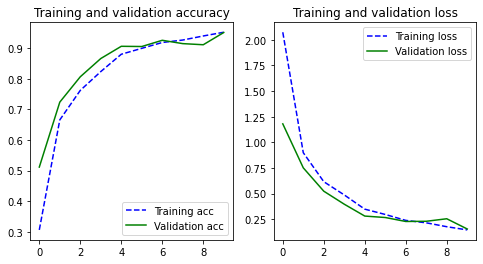

In [33]:
print("EVALUATION DU MODELE " + model1.name)
loss_and_metrics = model1.evaluate(x_simpleTest, y_simpleTest, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

plot_training_analysis(history, 'sparse_categorical_accuracy')

In [6]:
#print_false_values(model1, labels1, x_simpleTest, y_simpleTest)

**Efficacité de *simple-database* sur une base de test réaliste**

In [7]:
x_realisticTest, y_realisticTest = load_data(path1, labels1, _dataset='realistic-test', _imagesize=IMAGE_SIZE1)

DATASET         : ./databases/simple-database/realistic-test
NOMBRE D'IMAGES : 397



PREDICTIONS sur la donnée n°248/396
     Apples-Braeburn -> 99.99%
     Apples-Granny-Smith -> 0.00%
     Apricots -> 0.00%
     Clementines -> 0.00%
     Corns -> 0.00%
     Cucumber-Ripes -> 0.00%
     Green-Peppers -> 0.00%
     Kiwis -> 0.00%
     Lemons -> 0.00%
     Limes -> 0.00%
     Mangos -> 0.00%
     Onions -> 0.00%
     Oranges -> 0.00%
     Peaches -> 0.01%
     Pineapples -> 0.00%
     Red-Peppers -> 0.00%
     Strawberries -> 0.00%
     Tomatoes -> 0.00%
     Watermelons -> 0.00%

RESULTAT : Apples-Braeburn / 99.99%
ATTENDU  : Oranges


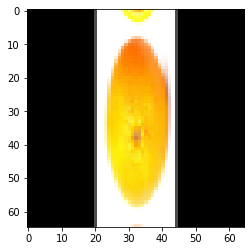

In [8]:
test_data(model1, labels1, x_realisticTest, y_realisticTest)

In [22]:
print("EVALUATION DU MODELE " + model1.name)
loss_and_metrics = model1.evaluate(x_realisticTest, y_realisticTest, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

EVALUATION DU MODELE basic_convolutional_network
40/40 [==============================] - 1s 15ms/step - loss: 16.6367 - sparse_categorical_accuracy: 0.1461
LOSS     : 16.64
ACCURACY : 14.61%


Notez que le présent modèle est bien mauvais pour prédire la classe d'une image plus réaliste, plus complexe qu'un unique fruit sur fond blanc. Il vient donc l'idée d'élaborer une base de données réaliste dans un premier temps, puis hybride.

# **Partie 2** : realistic-database

**Paramètres de la base de données**

DATASET         : ./databases/realistic-database/train
NOMBRE D'IMAGES : 2922

DATASET         : ./databases/realistic-database/validation
NOMBRE D'IMAGES : 600

DATASET         : ./databases/realistic-database/test
NOMBRE D'IMAGES : 588



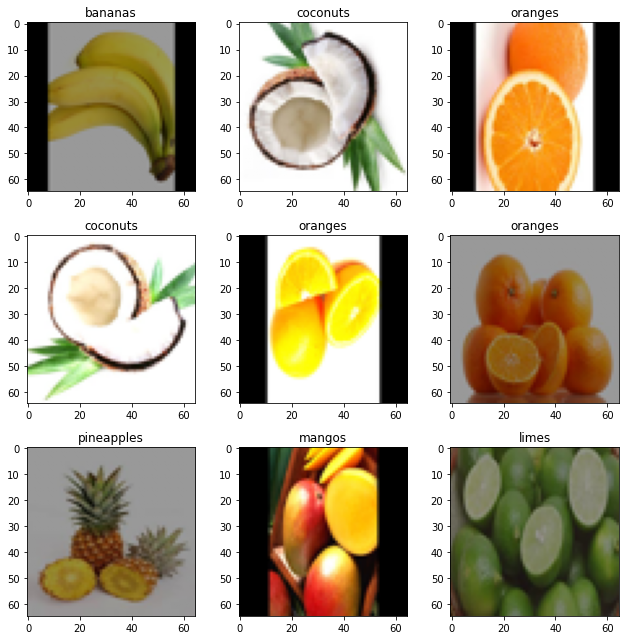

In [10]:
IMAGE_SIZE2 = 65
labels2 = ['apples', 'bananas', 'coconuts', 'grapes','lemons',
           'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']

x_train2, y_train2 = load_data(path2, labels2, _imagesize=IMAGE_SIZE2)
x_val2, y_val2 = load_data(path2, labels2, _dataset='validation', _imagesize=IMAGE_SIZE2)
x_test2, y_test2 = load_data(path2, labels2, _dataset='test', _imagesize=IMAGE_SIZE2)

plot_random_images(x_train2, y_train2, labels2)

**Lancement de l'entraînement**

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train2, y_train2)
val_generator = train_datagen.flow(x_val2, y_val2)

model2 = BasicConvolutionalNetwork(len(labels2), IMAGE_SIZE2)

In [11]:
model2.build(input_shape=(None, IMAGE_SIZE2, IMAGE_SIZE2, 3))
model2.summary()
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['sparse_categorical_accuracy'])

history = model2.fit(train_generator, 
                     validation_data=val_generator,
                     epochs=10)

Model: "basic_convolutional_network_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           multiple                  896       
                                                                 
 conv2d_5 (Conv2D)           multiple                  18496     
                                                                 
 conv2d_6 (Conv2D)           multiple                  54238     
                                                                 
 conv2d_7 (Conv2D)           multiple                  108416    
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                     

<b>Analyse post-entraînement</b>

PREDICTIONS sur la donnée n°203/587
     apples -> 0.54%
     bananas -> 0.00%
     coconuts -> 1.72%
     grapes -> 95.45%
     lemons -> 0.00%
     limes -> 0.05%
     mangos -> 0.07%
     oranges -> 0.00%
     pineapples -> 2.08%
     tomatoes -> 0.08%

RESULTAT : grapes / 95.45%
ATTENDU  : grapes


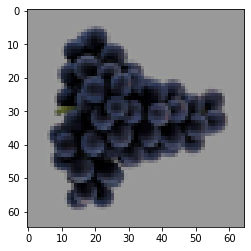

In [12]:
test_data(model2, labels2, x_test2, y_test2)

EVALUATION DU MODELE basic_convolutional_network_1
59/59 [==============================] - 1s 8ms/step - loss: 0.8156 - sparse_categorical_accuracy: 0.6259
LOSS     : 0.82
ACCURACY : 62.59%


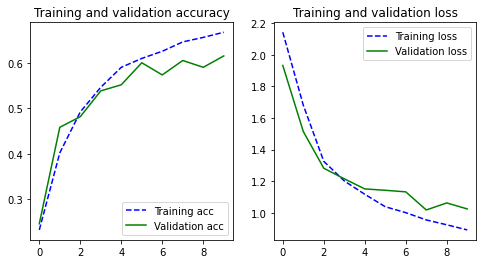

In [13]:
print("EVALUATION DU MODELE " + model2.name)
loss_and_metrics = model2.evaluate(x_test2, y_test2, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

plot_training_analysis(history, 'sparse_categorical_accuracy')

In [14]:
#print_false_values(model2, labels2, x_test2, y_test2)

Le précédent résultat n'étant pas satisfaisant, étudions les performances d'une base de données hybride entre la première et la deuxième.

# **Partie 3** : hybrid-database

**Paramètres de la base de données**

DATASET         : ./databases/hybrid-database/train
NOMBRE D'IMAGES : 6418

DATASET         : ./databases/hybrid-database/validation
NOMBRE D'IMAGES : 1164

DATASET         : ./databases/hybrid-database/test
NOMBRE D'IMAGES : 898



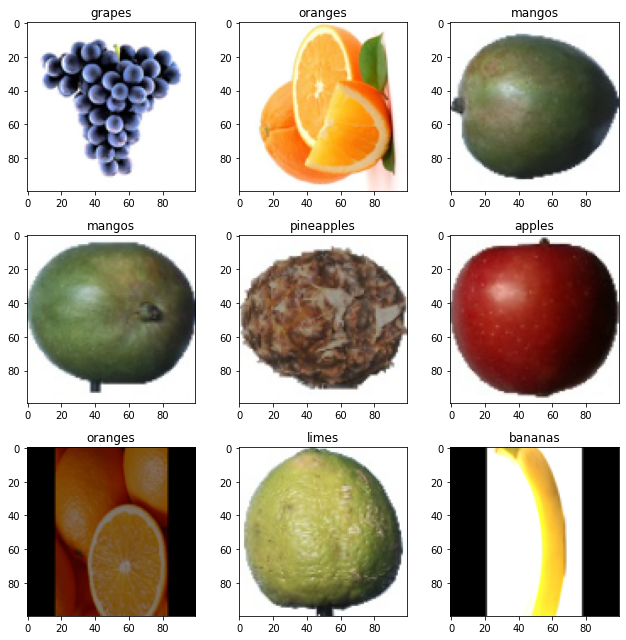

In [15]:
IMAGE_SIZE3 = 100
labels3 = ['apples', 'bananas', 'coconuts', 'grapes','lemons',
           'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']

x_train3, y_train3 = load_data(path3, labels3, _imagesize=IMAGE_SIZE3)
x_val3, y_val3 = load_data(path3, labels3, _dataset='validation', _imagesize=IMAGE_SIZE3)
x_test3, y_test3 = load_data(path3, labels3, _dataset='test', _imagesize=IMAGE_SIZE3)

plot_random_images(x_train3, y_train3, labels3)

**Lancement de l'entraînement**

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow(x_train3, y_train3)
val_generator = train_datagen.flow(x_val3, y_val3)

model3 = BasicConvolutionalNetwork(len(labels3), IMAGE_SIZE3)

In [16]:
model3.build(input_shape=(None, IMAGE_SIZE3, IMAGE_SIZE3, 3))
model3.summary()
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['sparse_categorical_accuracy'])

history = model3.fit(train_generator, 
                     validation_data=val_generator,
                     epochs=10)

Model: "basic_convolutional_network_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           multiple                  896       
                                                                 
 conv2d_9 (Conv2D)           multiple                  18496     
                                                                 
 conv2d_10 (Conv2D)          multiple                  54238     
                                                                 
 conv2d_11 (Conv2D)          multiple                  108416    
                                                                 
 max_pooling2d_2 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         multiple                  0         
                                     

<b>Analyse post-entraînement</b>

PREDICTIONS sur la donnée n°560/897
     apples -> 0.00%
     bananas -> 0.00%
     coconuts -> 0.00%
     grapes -> 0.00%
     lemons -> 0.00%
     limes -> 0.24%
     mangos -> 99.76%
     oranges -> 0.00%
     pineapples -> 0.00%
     tomatoes -> 0.00%

RESULTAT : mangos / 99.76%
ATTENDU  : mangos


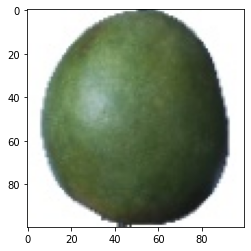

In [17]:
test_data(model3, labels3, x_test3, y_test3)

EVALUATION DU MODELE basic_convolutional_network_2
90/90 [==============================] - 2s 23ms/step - loss: 0.5161 - sparse_categorical_accuracy: 0.8441
LOSS     : 0.52
ACCURACY : 84.41%


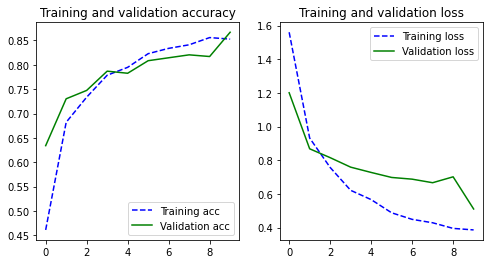

In [21]:
print("EVALUATION DU MODELE " + model3.name)
loss_and_metrics = model3.evaluate(x_test3, y_test3, batch_size=10)
print("LOSS     : {0:.2f}".format(loss_and_metrics[0]))
print("ACCURACY : {0:.2f}%".format(loss_and_metrics[1] * 100))

plot_training_analysis(history, 'sparse_categorical_accuracy')

In [19]:
#print_false_values(model3, labels3, x_test3, y_test3)

# **Analyse des résultats**

*simple-database* affiche une précision de l'ordre de 95 à 100%, *realistic-database* une précision de 65 à 75%, et *hybrid-database* une précision de 80 à 85%.

Qu'en conclure ?

- Les résultats de la première BD sont très bons car une photo se présente toujours sous la forme d'un fruit sur fond blanc. Il est donc aisé pour le modèle d'apprendre la forme et la couleur du fruit. En revanche, il se montre assez mauvais pour classifier des images de fruits plus réalistes, d'où l'idée d'élaborer une base de données réaliste puis hybride.
- Dans la deuxième BD, les choses se compliquent. Les fruits sont rarement seuls, parfois ils sont coupés en deux, et souvent ils sont posés sur une table, ce qui change du simple fond blanc. En terme de couleur, il y a beaucoup plus d'informations, en terme de forme, c'est plus délicat aussi, et désormais l'intérieur du fruit compte. Il y a plus d'informations à gérer, donc statistiquement cela se traduit par une précision plus faible.
- Partant de là, nous décidâmes d'élaborer une approche hybride, et de construire une BD intégrant des éléments de la première et de la deuxième. Le but étant, à la fois de mémoriser au mieux la forme et la couleur de chaque fruit, et de pouvoir corréler ces informations à un contexte plus réaliste. Le résultat, s'il n'est pas transcendant (le trop plein d'informations l'oblige), demeure convenable.

# **Annexe** : Quels fruits sont-ils ?

*Les candidats à l'élection maraîchère de 2022 se prêtent à l'exercice...*

DATASET         : ./databases/simple-database/election-test
NOMBRE D'IMAGES : 12



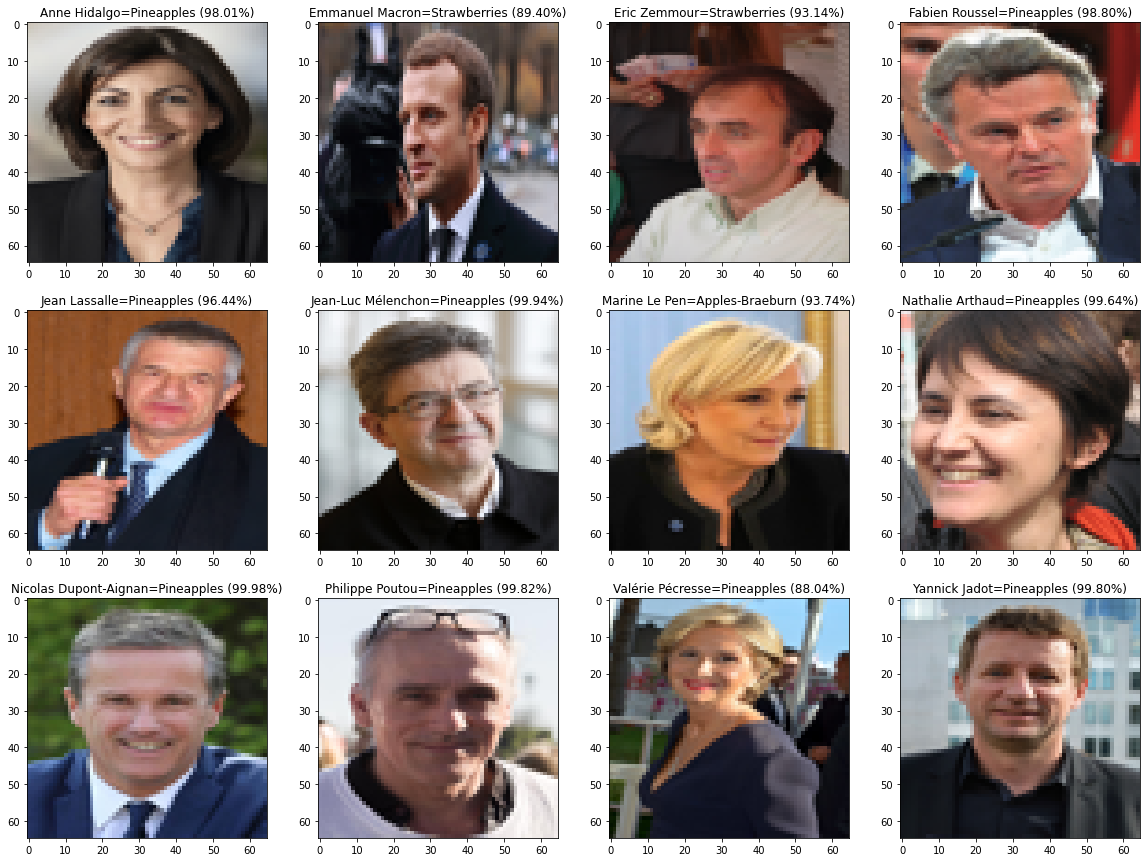

In [20]:
x_electionTest, _ = load_data(path1, labels1, _dataset="election-test", _imagesize=IMAGE_SIZE1)
plot_candidates(model1, labels1, x_electionTest)